Downloading the Zip File Using gdown

In [19]:
import gdown
import zipfile
import os
import pandas as pd

# URL of the file on Google Drive
file_url = "https://drive.google.com/uc?id=12MfYQpBl_79ak9K7VHx4jDEaeFUEhHEO"

# Output file name (zip file)
output_zip = "spam.zip"

# Download the zip file from Google Drive
gdown.download(file_url, output_zip, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12MfYQpBl_79ak9K7VHx4jDEaeFUEhHEO
To: /content/spam.zip
100%|██████████| 3.58M/3.58M [00:00<00:00, 154MB/s]


'spam.zip'

Unzipping the File

In [20]:
# Unzipping the downloaded file
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall("spam_files")  # Extract contents to 'spam_files' folder

# Optionally, delete the zip file to save space
os.remove(output_zip)


Loading the Extracted CSV File

In [21]:
# Load the CSV file into a DataFrame
df = pd.read_csv('spam_files/url_spam_classification.csv')

# Display the first few rows of the DataFrame to verify successful loading
print(df.head())


                                                 url  is_spam
0  https://briefingday.us8.list-manage.com/unsubs...     True
1                             https://www.hvper.com/     True
2                 https://briefingday.com/m/v4n3i4f3     True
3   https://briefingday.com/n/20200618/m#commentform    False
4                        https://briefingday.com/fan     True


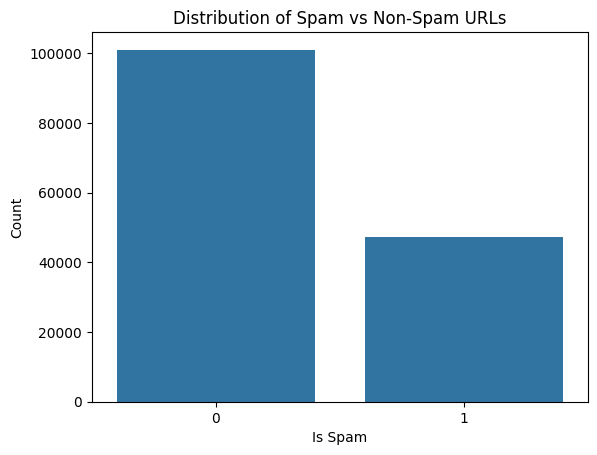

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the distribution of 'is_spam' column
spam_distribution = df['is_spam'].value_counts()

# Plotting the distribution using seaborn
sns.barplot(x=spam_distribution.index, y=spam_distribution.values)

# Adding labels and title
plt.title('Distribution of Spam vs Non-Spam URLs')
plt.xlabel('Is Spam')
plt.ylabel('Count')

# Display the plot
plt.show()

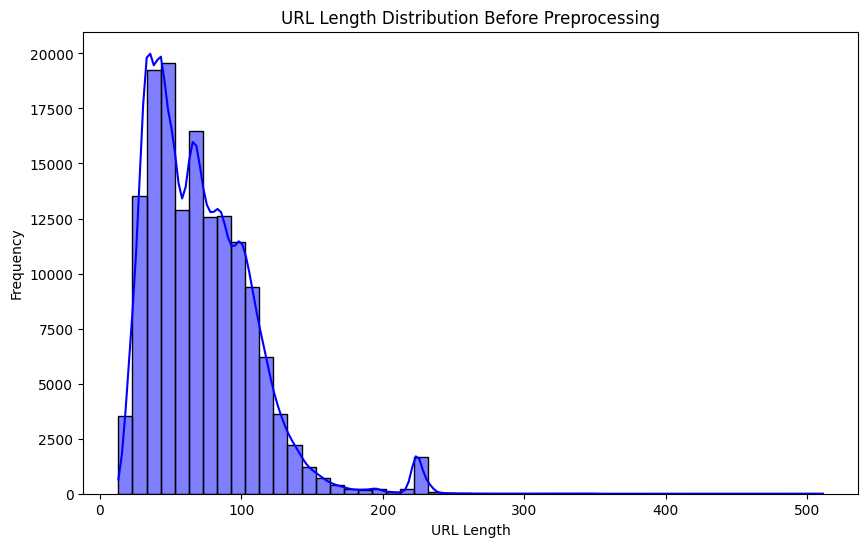

In [36]:


# Step 2: Visualization - URL Length Distribution (Before Preprocessing)
df['url_length'] = df['url'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['url_length'], kde=True, bins=50, color='blue')
plt.title("URL Length Distribution Before Preprocessing")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

Step 2: Preprocess the Data

In [22]:
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert 'is_spam' to numerical (0 for non-spam, 1 for spam)
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x is True else 0)


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
5,https://www.brookings.edu/interactives/reopeni...,0
6,https://www.reuters.com/investigates/special-r...,0
7,https://www.theatlantic.com/magazine/archive/2...,0
8,https://www.vox.com/2020/6/17/21294680/john-bo...,0
9,https://www.theguardian.com/travel/2020/jun/18...,0


Bidirectional LSTM Architecture

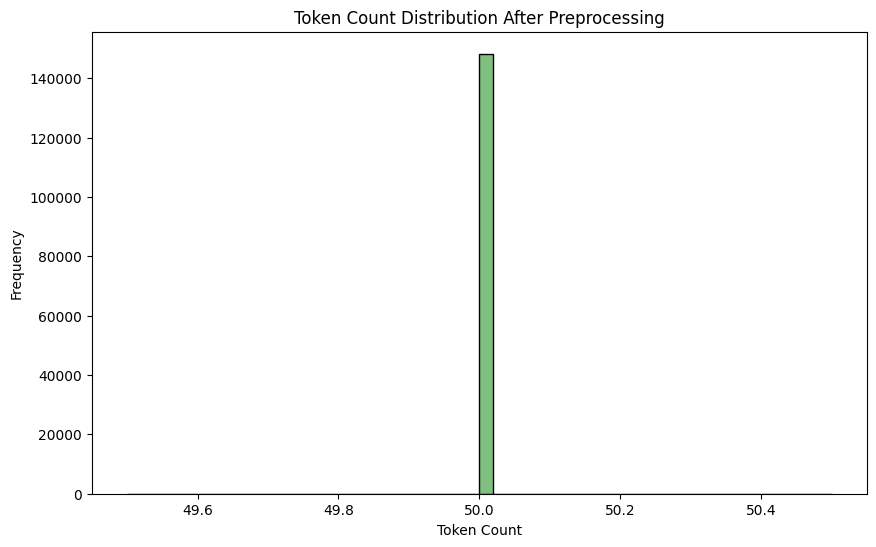

Step 3: Build the Bidirectional LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 706,177 (2.69 MB)

 Trainable params: 706,177 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the model

Epoch 1/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9092 - loss: 0.2207 - val_accuracy: 0.9556 - val_loss: 0.1162
Epoch 2/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9661 - loss: 0.0891 - val_accuracy: 0.9690 - val_loss: 0.0872
Epoch 3/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9758 - loss: 0.0641 - val_accuracy: 0.9718 - val_loss: 0.0756
Epoch 4/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9787 - loss: 0.0538 - val_accuracy: 0.9740 - val_loss: 0.0713
Epoch 5/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9810 - loss: 0.0491 - val_accuracy: 0.9756 - val_loss: 0.0703
Epoch 6/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9819 - loss: 0.0443 - val_accuracy: 0.9765 - val_loss: 0.0693
Epoch 7/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9836 - loss: 0.0403 - val_accuracy: 0.9770 - val_loss: 0.0720
Epoch 8/10
3708/3708 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.9840 - loss: 0

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

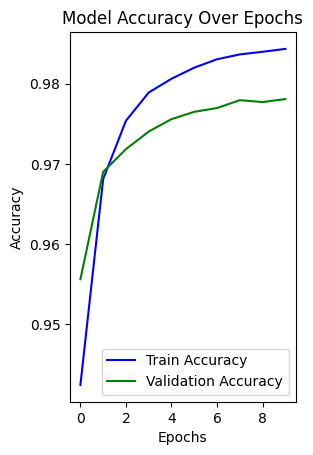

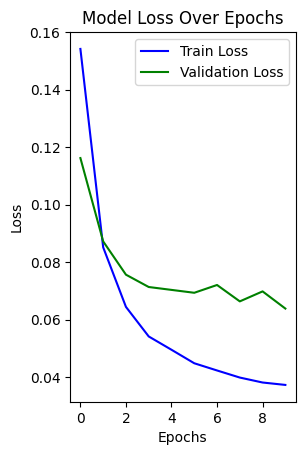

Step 5: Evaluate the model

927/927 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9777 - loss: 0.0663
Test Accuracy: 0.9781


Step 6: Predict on new data (if you want to test on new links)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Link: http://spammy-link.net/bad1 | Predicted: Not Spam
Link: https://www.google.com | Predicted: Spam
Link: http://phishing-site.com/claim | Predicted: Not Spam
Link: https://www.trustedsource.com/resource | Predicted: Not Spam
Link: https://briefingday.com/m/v4n3i4f3 | Predicted: Spam
Link: https://briefingday.com/m/abc | Predicted: Spam
Link: https://www.hvper.com/ | Predicted: Spam
Link: https://briefingday.com/n/20200618/m#commentform | Predicted: Not Spam
